<a href="https://colab.research.google.com/github/VyshnaviBasude/Team-TrailBlazers/blob/main/Data%20Modeling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/rideshare_kaggle.csv.zip", 'r') as zObject:

	# Extracting all the members of the zip
	# into a specific location.
	zObject.extractall( path="/content/")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df= pd.read_csv("/content/rideshare_kaggle.csv")
df.head(4)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800


In [6]:
df.dropna(inplace=True)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [9]:
# Define target and ID columns:
target = 'distance'
IDcol = 'product_id'

attributes = [
    "id", "timestamp", "hour", "day", "month", "datetime", "timezone", "source",
    "destination", "cab_type", "product_id", "name", "price", "distance",
    "surge_multiplier", "latitude", "longitude", "temperature",
    "apparentTemperature", "short_summary", "long_summary", "precipIntensity",
    "precipProbability", "humidity", "windSpeed", "windGust", "windGustTime",
    "visibility", "temperatureHigh", "temperatureHighTime", "temperatureLow",
    "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime",
    "apparentTemperatureLow", "apparentTemperatureLowTime", "icon", "dewPoint",
    "pressure", "windBearing", "cloudCover", "uvIndex", "visibility.1", "ozone",
    "sunriseTime", "sunsetTime", "moonPhase", "precipIntensityMax", "uvIndexTime",
    "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
    "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax",
    "apparentTemperatureMaxTime"
    ]

In [11]:
predictors = [x for x in attributes if x not in [target, IDcol]]

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is in a DataFrame called 'df'
feature_columns = ['hour', 'day', 'month', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model with adjusted parameters
model = LogisticRegression(C=0.01, solver="liblinear", class_weight='balanced', max_iter=100000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.5055879494655005

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.48      0.43      0.46     61339
        Uber       0.52      0.58      0.55     66257

    accuracy                           0.51    127596
   macro avg       0.50      0.50      0.50    127596
weighted avg       0.50      0.51      0.50    127596



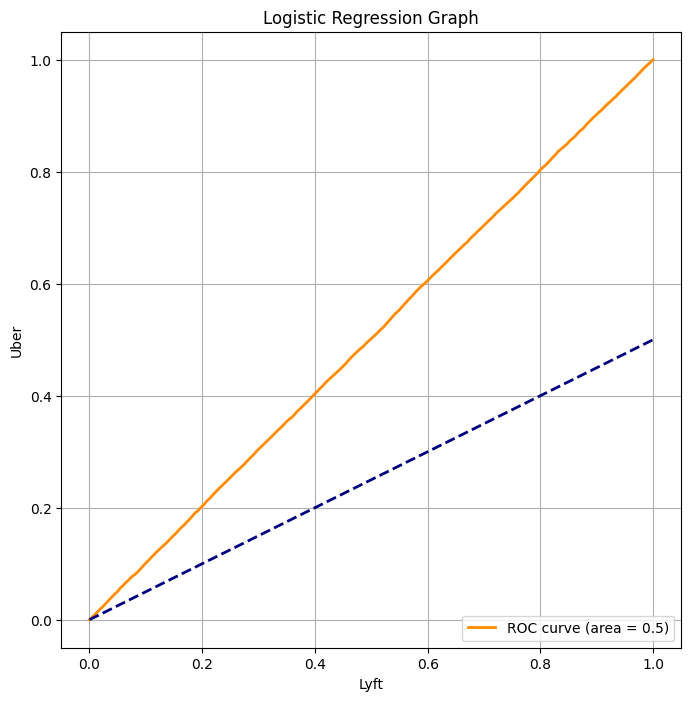

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import roc_curve, auc
import matplotlib. pyplot as plt
log_reg = LogisticRegression()
log_reg.fit (X_train, y_train)
y_scores = model.decision_function(X_test)

# Encode 'Lyft' as 0 and 'Uber' as 1
y_test_binary = y_test.map({'Lyft': 0, 'Uber': 1})

# Now you can calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)


plt. figure (figsize=(8, 8))
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label='ROC curve (area = %0.1f)' % roc_auc)

plt.plot ([0, 1], [0, 0.5], color= 'navy', lw=2, linestyle='--')
plt. xlabel ('Lyft')
plt.ylabel ('Uber')
plt.title( 'Logistic Regression Graph')
plt. legend (loc="lower right")
plt.grid (True)
plt. show()



In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are your training features and labels respectively,
# and X_test and y_test are your testing features and labels respectively.

# Initialize Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print hyperparameters and parameters
hyperparameters = {}  # GaussianNB doesn't have hyperparameters to tune
parameters = {
    "class_prior": naive_bayes.class_prior_,  # Class priors (prior probabilities)
    "class_count": naive_bayes.class_count_,  # Number of training samples observed in each class
    "theta_": naive_bayes.theta_,            # Mean of each feature per class
   # "sigma_": naive_bayes.sigma_,            # Variance of each feature per class
}

print("Accuracy:", accuracy)
print("Hyperparameters:", hyperparameters)
print("Parameters:", parameters)
print('\nClassification Report:\n', classification_report(y_test,y_pred))

Accuracy: 0.5192717640051412
Hyperparameters: {}
Parameters: {'class_prior': array([0.482129, 0.517871]), 'class_count': array([246069., 264311.]), 'theta_': array([[ 0.00102873, -0.00195434,  0.0007252 ,  0.00247731,  0.00329793],
       [-0.00095773,  0.00181945, -0.00067515, -0.00230633, -0.00307031]])}

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.00      0.00      0.00     61339
        Uber       0.52      1.00      0.68     66257

    accuracy                           0.52    127596
   macro avg       0.26      0.50      0.34    127596
weighted avg       0.27      0.52      0.35    127596



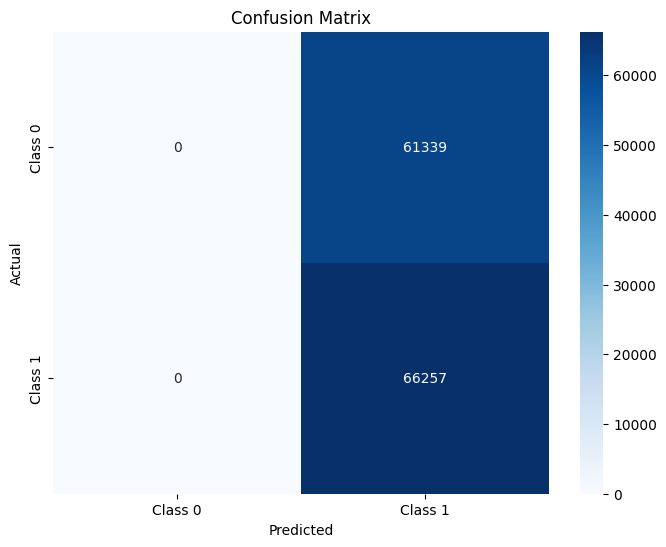

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


feature_columns = ['hour', 'day', 'month', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree classifier with specified hyperparameters
# max_depth controls the maximum depth of the tree
# min_samples_split is the minimum number of samples required to split an internal node
# You can adjust these values based on your dataset and desired complexity of the tree
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=4)

# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
print('\nClassification Report:\n', classification_report(y_test,y_pred))

Accuracy: 0.5207530016614941

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.51      0.08      0.13     61339
        Uber       0.52      0.93      0.67     66257

    accuracy                           0.52    127596
   macro avg       0.52      0.50      0.40    127596
weighted avg       0.52      0.52      0.41    127596



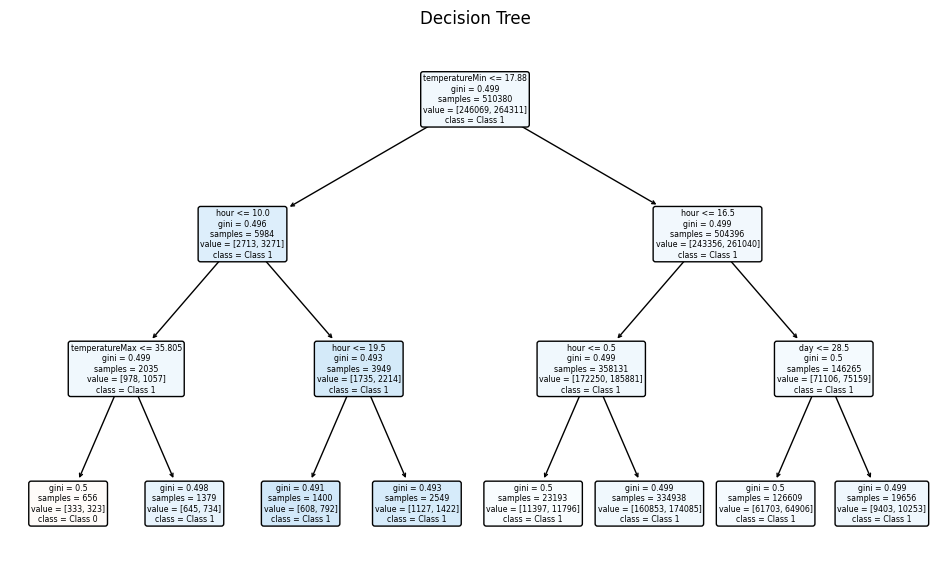

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth= 3)
dt.fit(X_train,y_train)

# Assuming decision_tree is already trained
plt.figure(figsize=(12, 7))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'], rounded =True)
plt.title('Decision Tree')
plt.show()


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels respectively
# You may need to preprocess your data first if it's not ready for modeling
# Assuming X and y are your features and labels respectively
# You may need to preprocess your data first if it's not ready for modeling
feature_columns = ['hour', 'day', 'month', 'temperatureMin', 'temperatureMax']
target_variable = 'cab_type'

# Create feature matrix (X) and target variable (y)
X = df[feature_columns]
y = df[target_variable]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a KNN classifier with specified hyperparameters
# n_neighbors is the number of neighbors to consider
# You can adjust this value based on your dataset
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)
print('\nClassification Report:\n', classification_report(y_test,y_pred))


Accuracy: 0.5007758863914229

Classification Report:
               precision    recall  f1-score   support

        Lyft       0.48      0.49      0.48     61339
        Uber       0.52      0.51      0.52     66257

    accuracy                           0.50    127596
   macro avg       0.50      0.50      0.50    127596
weighted avg       0.50      0.50      0.50    127596



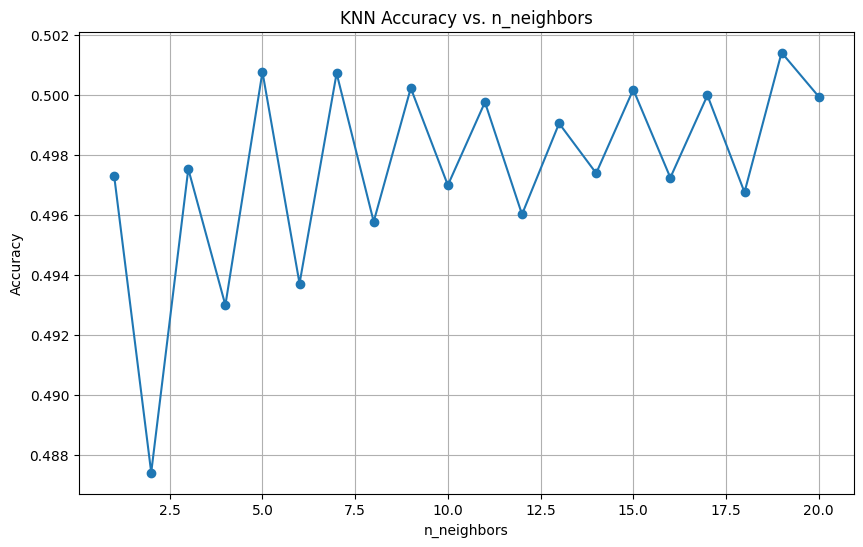

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined
# Initialize a list of candidate values for n_neighbors
n_neighbors_values = list(range(1, 21))  # Try values from 1 to 20

# Initialize an empty list to store accuracy scores
accuracy_scores = []

for n_neighbors in n_neighbors_values:
    # Initialize a KNN classifier with the current n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict the labels on the test set
    y_pred = knn.predict(X_test)

    # Calculate the accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

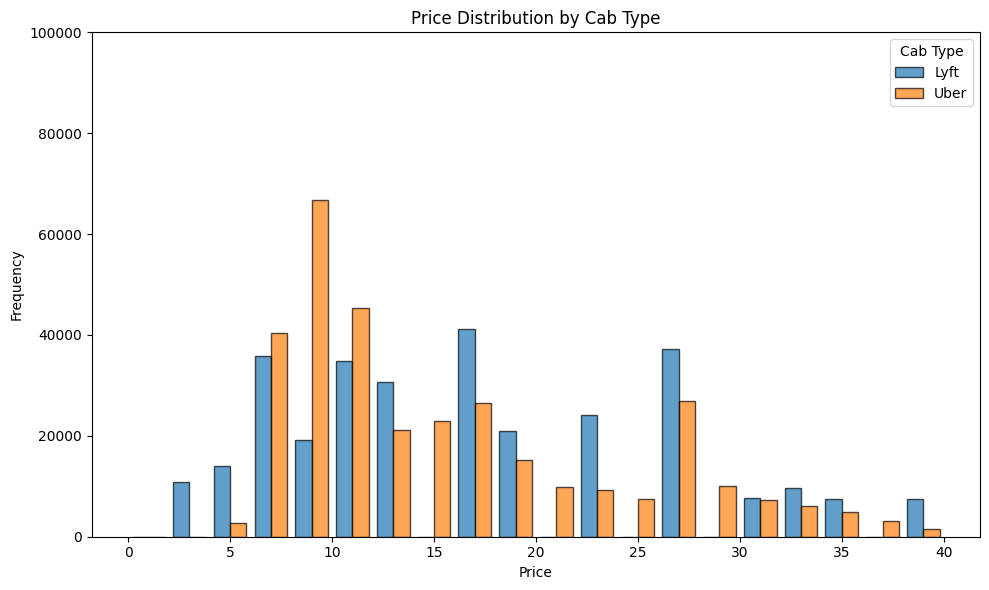

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Define the data
cab_types = df['cab_type'].unique()

# Set the number of bins for the price histogram
num_bins = 20

# Create a list of data for each cab type
data = [df[(df['cab_type'] == cab_type) & (df['price'] >= 0) & (df['price'] <= 40)]['price'] for cab_type in cab_types]

# Plot the histograms with specified ranges
plt.hist(data, bins=num_bins, range=(0, 40), alpha=0.7, label=cab_types, edgecolor='black')

# Set the y-axis limit to 100,000
plt.ylim(0, 100000)

# Add labels and title
plt.title('Price Distribution by Cab Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Cab Type')

plt.tight_layout()
plt.show()


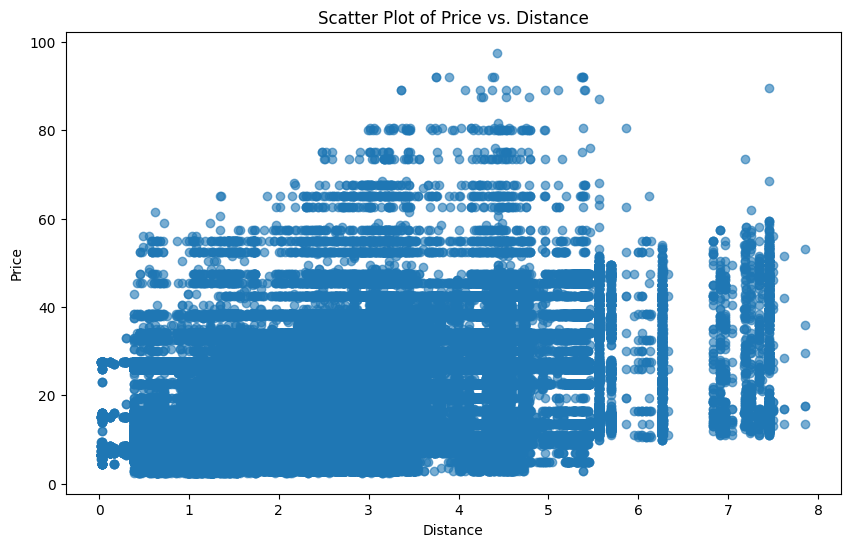

In [46]:
#Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['price'], alpha=0.6)
plt.title('Scatter Plot of Price vs. Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

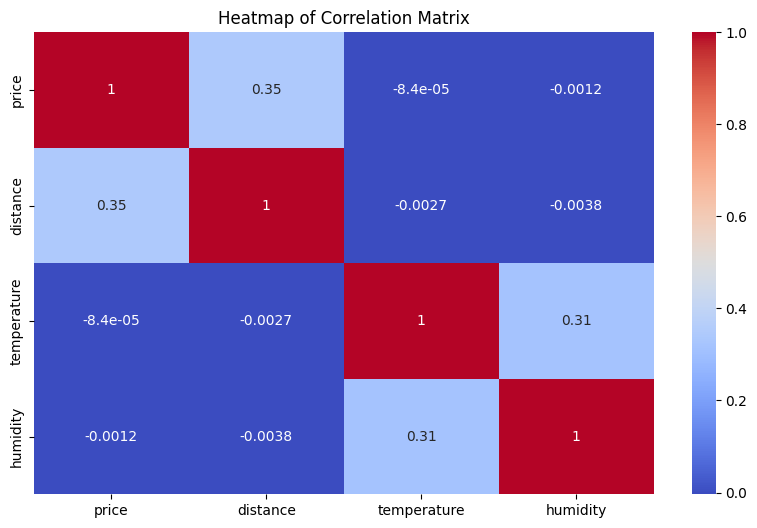

In [47]:
#Bivariant - Numerical & Numerical - Corelation matrix
numerical_attributes = ['price', 'distance', 'temperature', 'humidity']
correlation_matrix = df[numerical_attributes].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()